The purpose of this notebook is to explore the roots of random polynomials. The experiments will proceed as follows:

1) Replicate the results of Trefethen by plotting the roots of random polynomials with iid standard normal coefficients, both power basis and chebyshev

2) Plot the roots of random polynomials with coefficients drawn from different distributions

3) Investigate what happens to a polynomial under small perturbations

In [1]:
import numpy as np
np.random.seed(25)
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

# 0
Test plot for $x^2 + 1 = 0$ with roots at $x = \pm i$

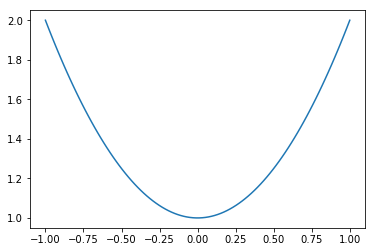

In [2]:
# generate a simple test case
poly_pow = np.polynomial.polynomial.Polynomial([1,0,1])
x = np.linspace(-1,1,100)
plt.plot(x,poly_pow(x))
plt.show()

[ 0.-1.j  0.+1.j]


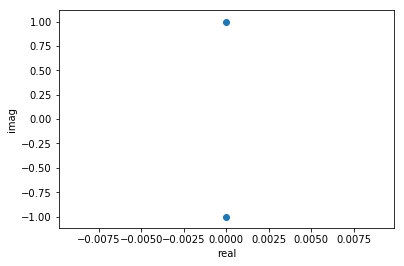

In [3]:
print(poly_pow.roots())
R = poly_pow.roots()
plt.scatter(R.real,R.imag)
plt.ylabel('imag')
plt.xlabel('real')
plt.show()

# 1
Replicate the results of Trefethen by plotting the roots of random power and chebyshev polynomials with iid standard normal coefficients

In [4]:
def random_coeffs(params,imag=False):
    """
    INPUT
        params (list) tuples specifying distribution type (str), args (list), and kwargs (dict).
    
    RETURNS
        coeffs
    
    """
    dist = {
        'normal':np.random.normal,
        'beta':np.random.beta,
        'uniform':np.random.uniform,
        'gamma':np.random.gamma,
        'exponential':np.random.exponential,
        'lognormal':np.random.lognormal,
        'zeros':np.zeros
    }
    
    coeffs = np.array([])
    for p in params:
        dist_name,params,kwargs = p
        coeffs = np.append(coeffs,dist[dist_name](*params,**kwargs))
        if imag:
            coeffs.astype(np.complex64)
            coeffs.imag = dist[dist_name](*params,**kwargs)
    coeffs = np.append(coeffs,np.array([1.]))
    return coeffs


def p_type(coeffs, basis='power'):
    """
    Return a polynomial object using the specified polynomial type.
    
    INPUT
        coeffs (array)
        basis (str) the key to specify the polynomial object type
    
    """
    P = {'power':np.polynomial.polynomial.Polynomial,
         'chebyshev':np.polynomial.chebyshev.Chebyshev,
         'power_imag':np.polynomial.polynomial.polyfromroots}
    return P[basis](coeffs)


# generate several random polynomials with various distributions and plot their roots
def poly_roots(params,basis='power',niters=1):
    """
    Plot random polynomials and their roots with coefficients specified by params.
    
    INPUTS
        params (list) input to the random_coeffs function
        basis (str) which polynomial type to use
        niters (int) number of polynomials to simulate
    
    """

    
    fig = plt.figure(figsize=(12,6))
    x = np.linspace(-1,1,100) # used for plotting P(x)
    X = [] # to store the real part of the roots
    Y = [] # to store the imaginary part of the roots
    plt.subplot(1,2,1) # the first subplot shows the polynomial on the xy plane
    plt.plot(x,np.zeros_like(x),color='grey') # plots the line y=0
    for i in range(niters):
        coeffs = random_coeffs(params)
        #P = np.polynomial.polynomial.Polynomial(coeffs)
        P = p_type(coeffs,basis)
        R = P.roots() # get the roots of P(x)
        X.append(R.real)
        Y.append(R.imag)
        plt.plot(x,P(x),color='r',alpha=.2,lw=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("P(x), degree %s" % (len(coeffs)-1))

    plt.subplot(1,2,2)
    plt.scatter(X,Y,alpha=.3,s=10)
    plt.title("The Roots of P(x), degree %s" % (len(coeffs)-1))
    plt.xlabel('real')
    plt.ylabel('imag')
    plt.xlim(-1.5,1.5)
    plt.ylim(-1.5,1.5)
    plt.show()

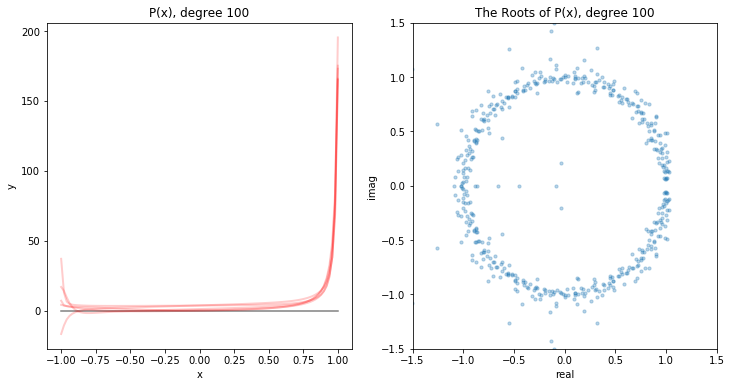

In [5]:
params = [('lognormal',[0,1],{'size':100})]
poly_roots(params,niters=5)

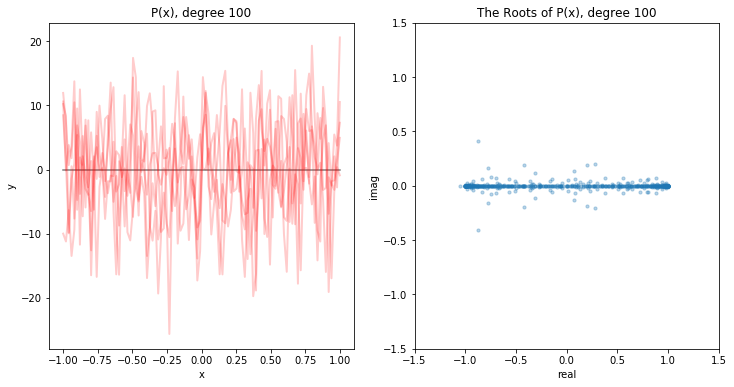

In [6]:
params = [('normal',[0,1],{'size':100})]
poly_roots(params,basis='chebyshev',niters=5)

# 2
Plot the roots of random polynomials with coefficients drawn from different distributions

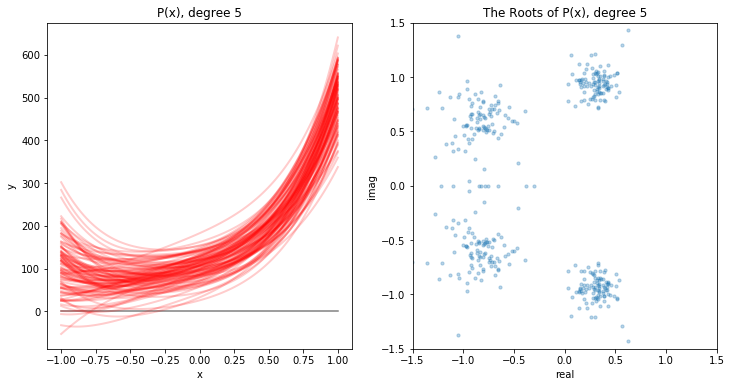

In [7]:
# normal with mean 100 and standard deviation 30
params = [('normal',[100,30],{'size':5})]
poly_roots(params,niters=100)

### Gamma(2,2)

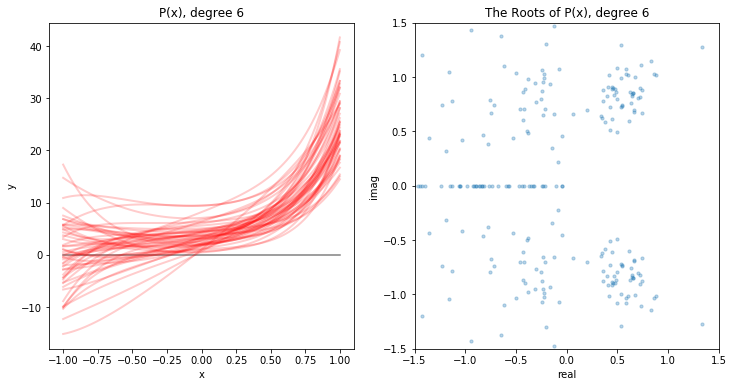

In [8]:
params = [('gamma',[2,2],{'size':6})]
poly_roots(params,niters=50)

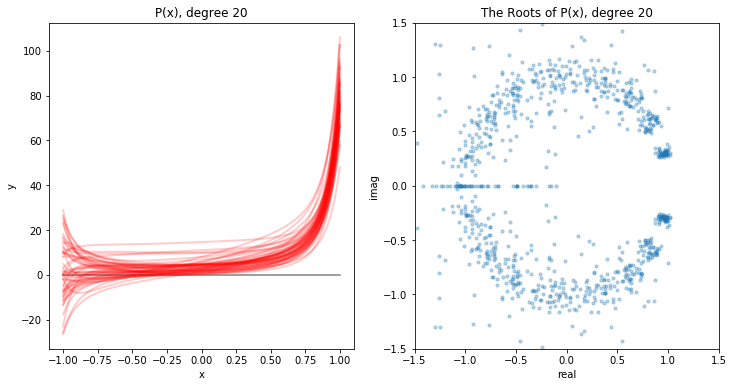

In [9]:
params = [('gamma',[2,2],{'size':20})]
poly_roots(params,niters=50)

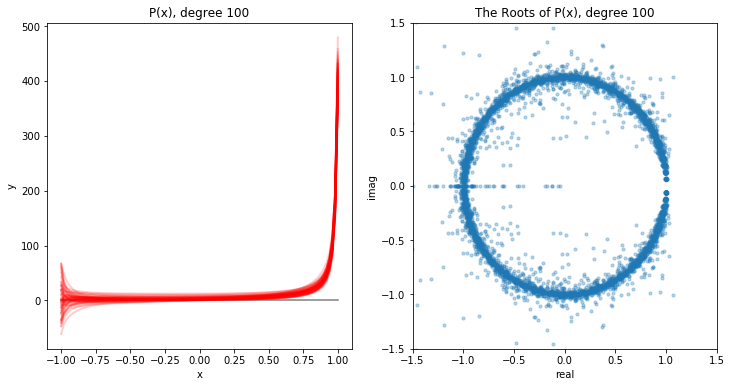

In [10]:
params = [('gamma',[2,2],{'size':100})]
poly_roots(params,niters=50)

### Beta(.5,.5)

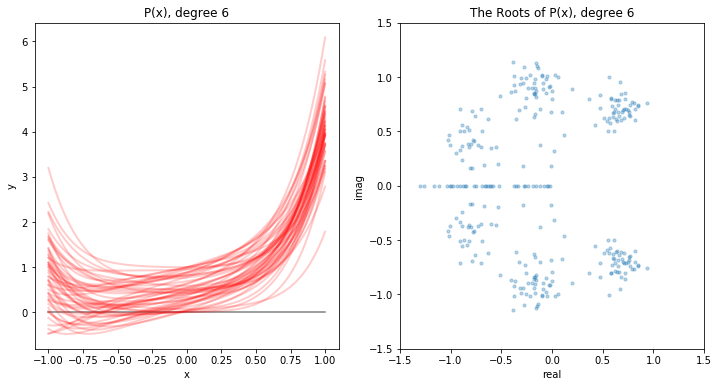

In [11]:
params = [('beta',[.5,.5],{'size':6})]
poly_roots(params,niters=50)

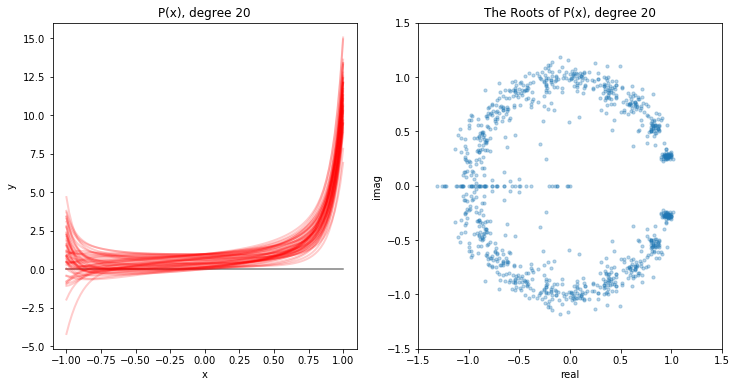

In [12]:
params = [('beta',[.5,.5],{'size':20})]
poly_roots(params,niters=50)

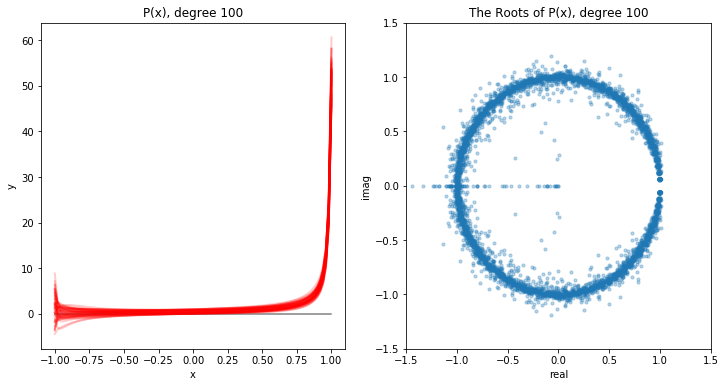

In [13]:
params = [('beta',[.5,.5],{'size':100})]
poly_roots(params,niters=50)

### Normal(0,1) + Gamma(2,2) + Beta(.5,.5)

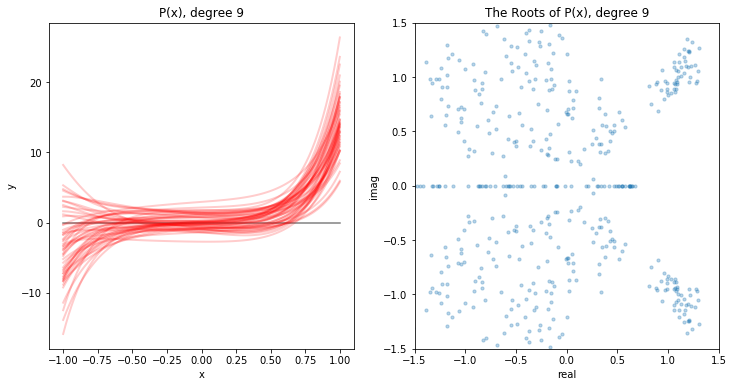

In [14]:
params = [('normal',[0,1],{'size':3}), ('gamma',[2,2],{'size':3}), ('beta',[.5,.5],{'size':3})]
poly_roots(params,niters=50)

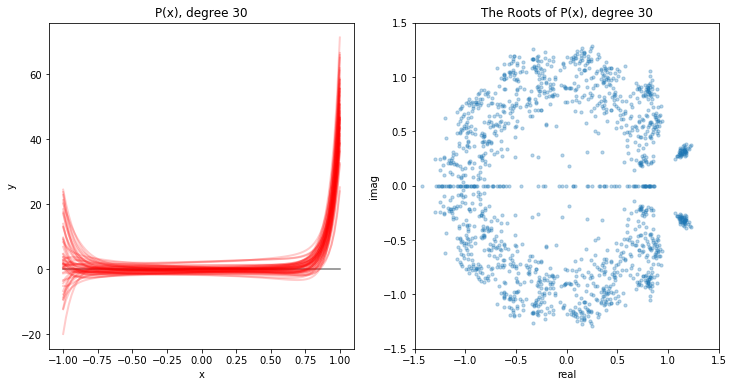

In [15]:
params = [('normal',[0,1],{'size':10}), ('gamma',[2,2],{'size':10}), ('beta',[.5,.5],{'size':10})]
poly_roots(params,niters=50)

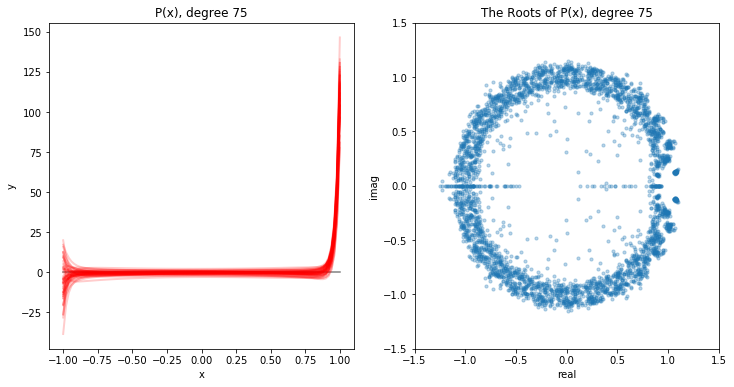

In [16]:
params = [('normal',[0,1],{'size':25}), ('gamma',[2,2],{'size':25}), ('beta',[.5,.5],{'size':25})]
poly_roots(params,niters=50)

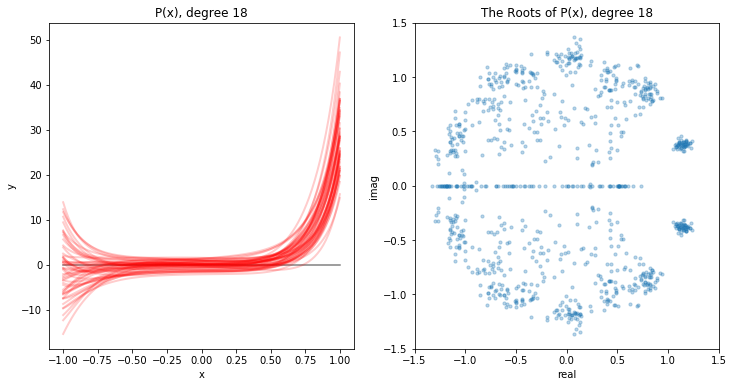

In [17]:
params = [('normal',[0,1],{'size':3}), ('gamma',[2,2],{'size':6}), ('beta',[.5,.5],{'size':9})]
poly_roots(params,niters=50)

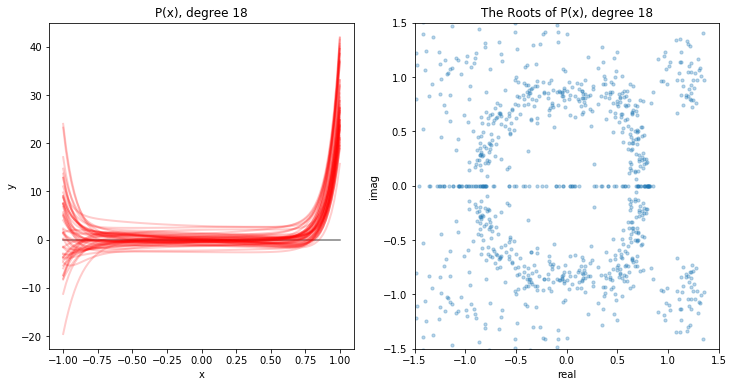

In [18]:
params = [('normal',[0,1],{'size':9}), ('gamma',[2,2],{'size':6}), ('beta',[.5,.5],{'size':3})]
poly_roots(params,niters=50)

Reversed coefficients

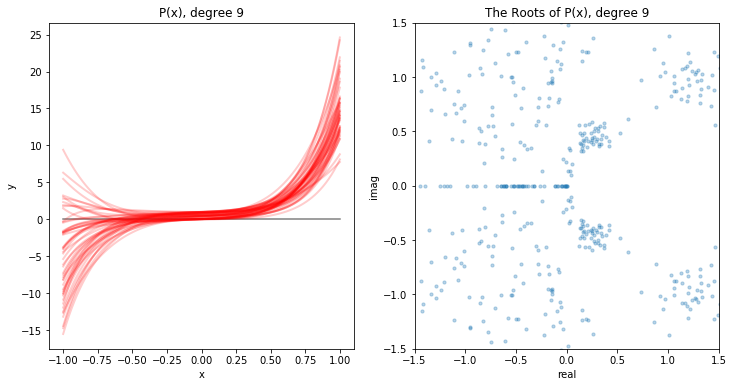

In [19]:
params = [('normal',[0,1],{'size':3}), ('gamma',[2,2],{'size':3}), ('beta',[.5,.5],{'size':3})]
poly_roots(params[::-1],niters=50)

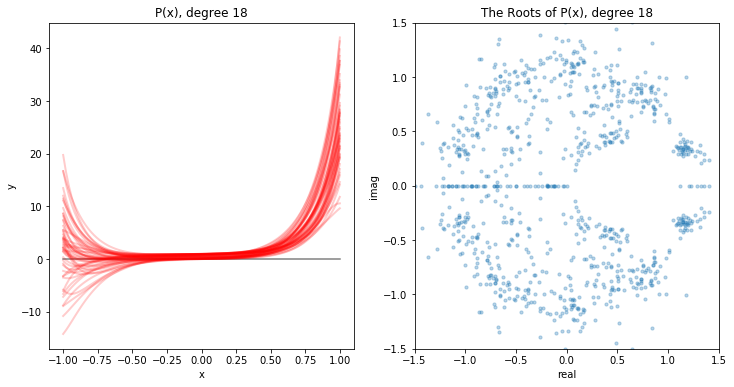

In [20]:
params = [('normal',[0,1],{'size':9}), ('gamma',[2,2],{'size':6}), ('beta',[.5,.5],{'size':3})]
poly_roots(params[::-1],niters=50)

### uniform(-1,1), zeros, Beta(.5,.5)

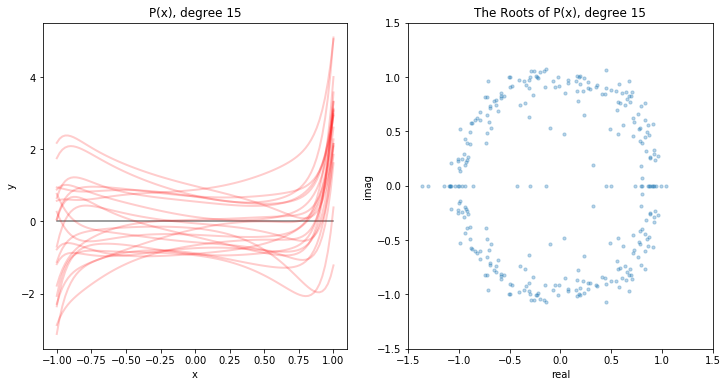

In [21]:
params = [('uniform',[-1,1],{'size':5}), ('zeros',[5],{}), ('beta',[.5,.5],{'size':5})]
poly_roots(params,niters=20)

### Exponential(.5)
A special case of gamma

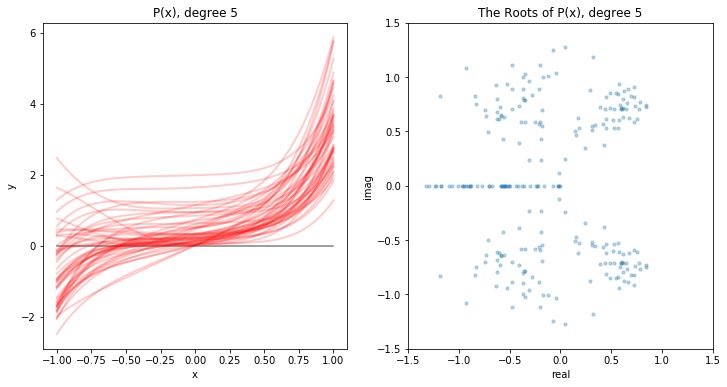

In [22]:
params = [('exponential',[.5],{'size':5})]
poly_roots(params,niters=50)

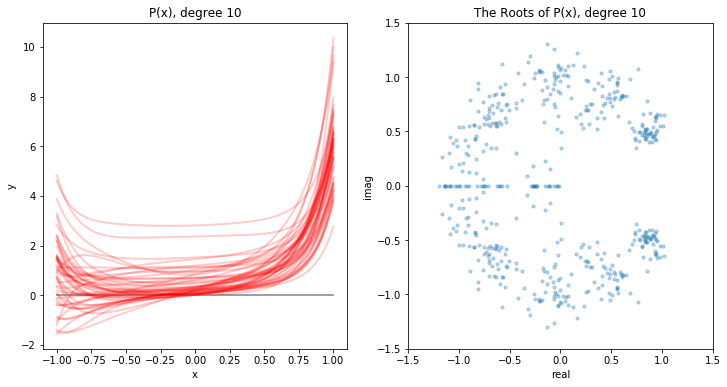

In [23]:
params = [('exponential',[.5],{'size':10})]
poly_roots(params,niters=50)

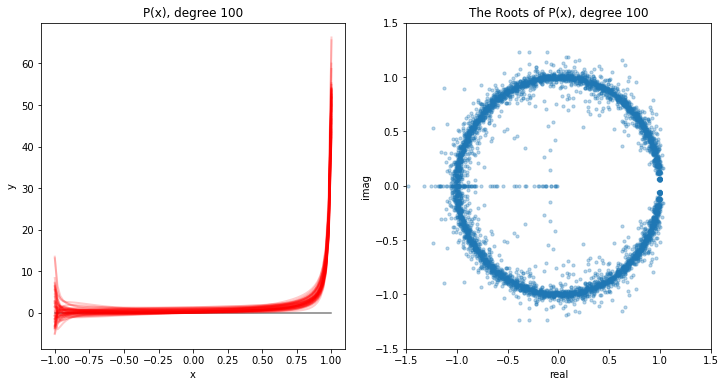

In [24]:
params = [('exponential',[.5],{'size':100})]
poly_roots(params,niters=50)

### zeros, beta(.5,.5)

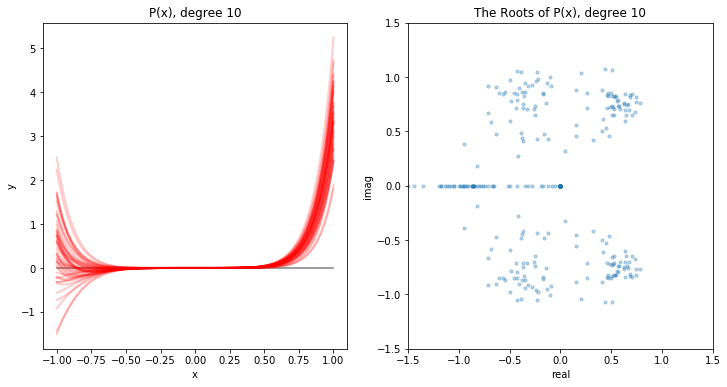

In [25]:
params = [('zeros',[5],{}), ('beta',[.5,.5],{'size':5})]
poly_roots(params,niters=50)

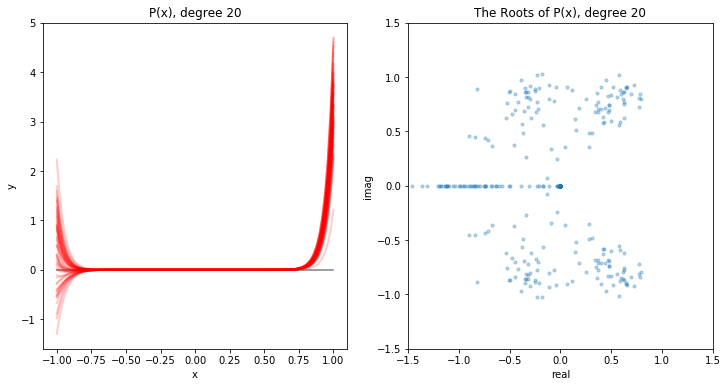

In [26]:
params = [('zeros',[15],{}), ('beta',[.5,.5],{'size':5})]
poly_roots(params,niters=50)

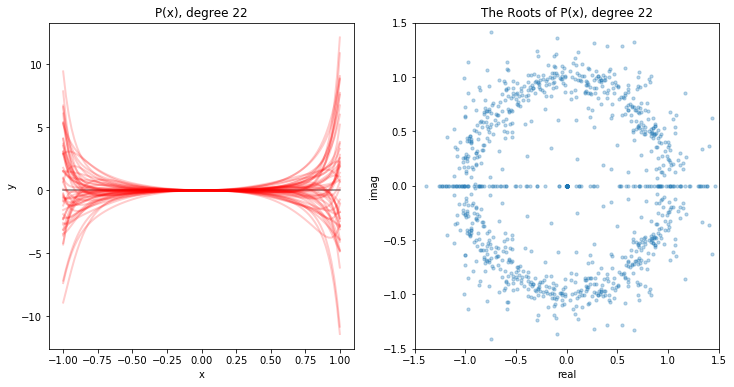

In [27]:
params = [('zeros',[2],{}), ('normal',[0,1],{'size':20})]
poly_roots(params,niters=50)

### Using chebyshev basis

First, the power basis...

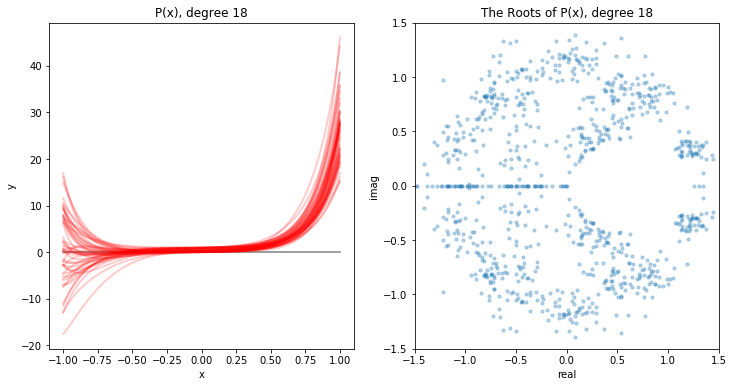

In [28]:
params = [('normal',[0,1],{'size':9}), ('gamma',[2,2],{'size':6}), ('beta',[.5,.5],{'size':3})]
poly_roots(params[::-1],niters=50)

Now the chebyshev basis

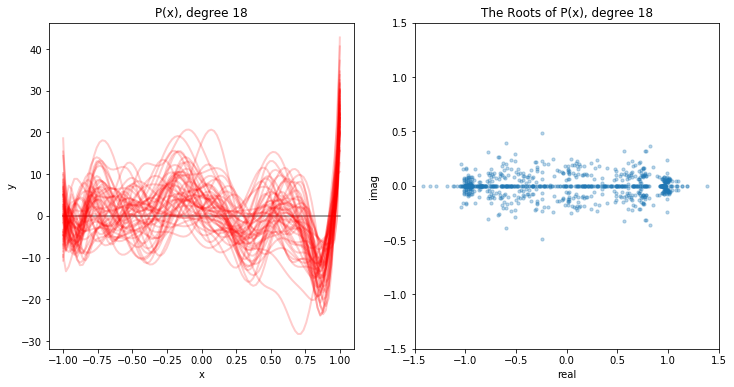

In [29]:
params = [('normal',[0,1],{'size':9}), ('gamma',[2,2],{'size':6}), ('beta',[.5,.5],{'size':3})]
poly_roots(params[::-1],basis='chebyshev',niters=50)

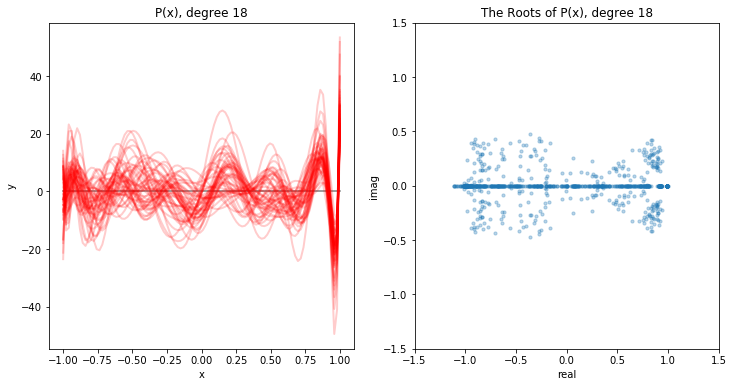

In [30]:
params = [('normal',[0,1],{'size':9}), ('gamma',[2,2],{'size':6}), ('beta',[.5,.5],{'size':3})]
poly_roots(params,basis='chebyshev',niters=50)

# 3
What happens to a perturbed polynomial?

In [31]:
def perturb(params):
    """
    INPUT
        params (list) tuples specifying distribution type (str), args (list), and kwargs (dict).
    
    RETURNS
        coeffs
    
    """
    dist = {
        'normal':np.random.normal,
        'beta':np.random.beta,
        'uniform':np.random.uniform,
        'gamma':np.random.gamma,
        'exponential':np.random.exponential,
        'zeros':np.zeros
    }
    
    coeffs = np.array([])
    for p in params:
        dist_name,params,kwargs = p
        coeffs = np.append(coeffs,dist[dist_name](*params,**kwargs))
    return coeffs

# generate several random polynomials with various distributions and plot their roots
def perturb_poly_roots(coeffs,p_mask,params,basis='power',niters=1):
    """
    Plot random polynomials and their roots with coefficients specified by params.
    
    INPUTS
        coeffs (array) coefficients of the deterministic polynomial
        p_mask (array) array of zeros and ones indicating which coefficients to perturb
        params (list) of tuples indicating the perturbation distribution and parameters
        basis (str) which polynomial type to use
        niters (int) number of polynomials to simulate
    
    """
    
    fig = plt.figure(figsize=(12,12))
    x = np.linspace(-1,1,100) # used for plotting P(x)
    X = [] # to store the real part of the roots
    Y = [] # to store the imaginary part of the roots
    plt.subplot(2,2,1) # the first subplot shows the polynomial on the xy plane
    plt.plot(x,np.zeros_like(x),color='grey') # plots the line y=0
    
    if coeffs[-1] != 1:
        coeffs[-1] = 1
    P = p_type(coeffs,basis)
    R = P.roots() # get the roots of P(x)
    X.append(R.real)
    Y.append(R.imag)
    plt.plot(x,P(x),color='k',alpha=.7,lw=3)
    
    plt.subplot(2,2,3)
    for i in range(niters):
        p_coeffs = coeffs.copy()
        p_coeffs[p_mask] += perturb(params)
        #print(p_coeffs)
        P = p_type(p_coeffs,basis) # generate the specified polynomial
        R = P.roots() # get the roots of P(x)
        X.append(R.real)
        Y.append(R.imag)
        plt.plot(x,P(x),'r',alpha=.2,lw=2)
        
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("P(x), degree %s" % (len(coeffs)-1))

    plt.subplot(2,2,2)
    plt.scatter(X[0],Y[0],color='k',alpha=.7)
    plt.subplot(2,2,4)
    plt.scatter(X[1:],Y[1:],alpha=.3,s=10)
    plt.title("The Roots of P(x), degree %s" % (len(coeffs)-1))
    plt.xlabel('real')
    plt.ylabel('imag')
    plt.xlim(-1.5,1.5)
    plt.ylim(-1.5,1.5)
    plt.show()

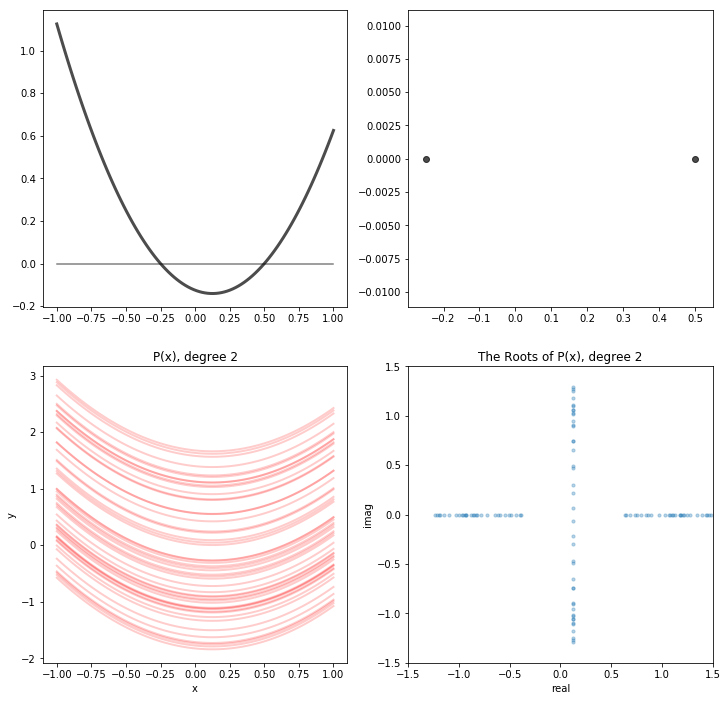

In [32]:
coeffs = np.array([-1./8,-1./4,1])
p_mask = np.array([True,False,False])
params = [('normal',[0,1],{'size':sum(p_mask)})]
perturb_poly_roots(coeffs,p_mask,params,niters=50)

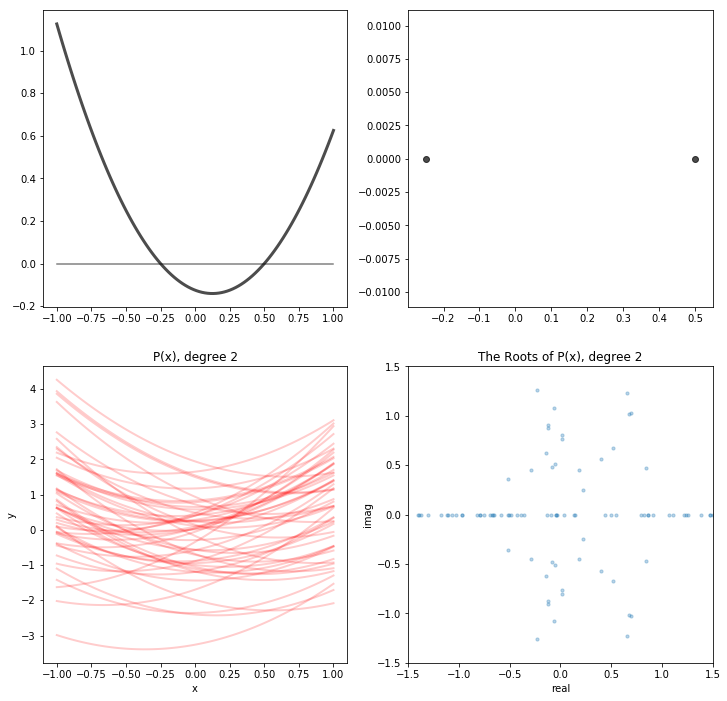

In [33]:
coeffs = np.array([-1./8,-1./4,1])
p_mask = np.array([True,True,False])
params = [('normal',[0,1],{'size':sum(p_mask)})]
perturb_poly_roots(coeffs,p_mask,params,niters=50)

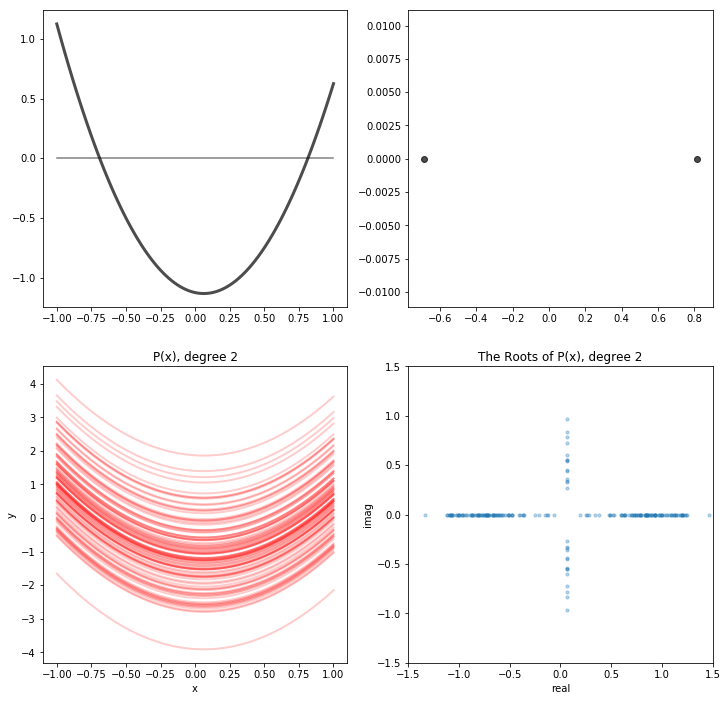

In [34]:
coeffs = np.array([-1./8,-1./4,1])
p_mask = np.array([True,False,False])
params = [('normal',[0,1],{'size':sum(p_mask)})]
perturb_poly_roots(coeffs,p_mask,params,basis='chebyshev',niters=100)

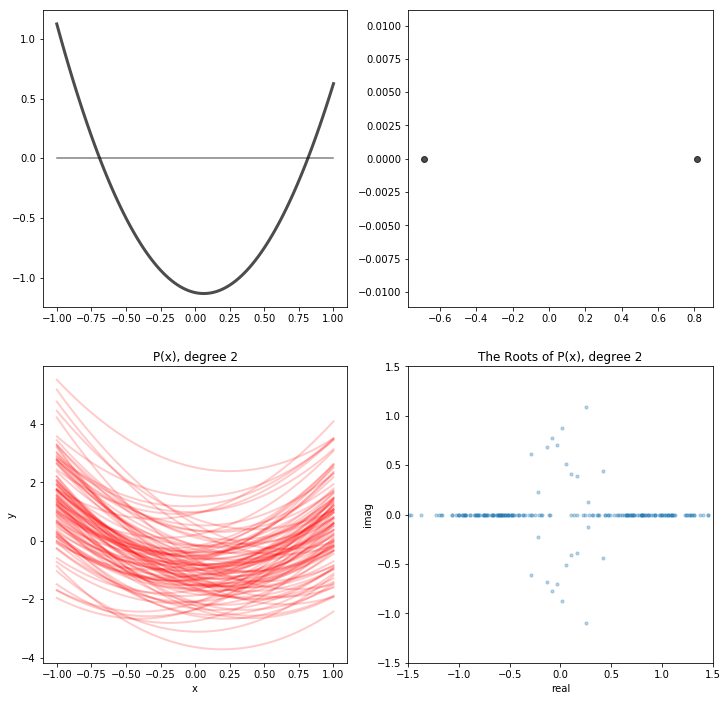

In [35]:
coeffs = np.array([-1./8,-1./4,1])
p_mask = np.array([True,True,False])
params = [('normal',[0,1],{'size':sum(p_mask)})]
perturb_poly_roots(coeffs,p_mask,params,basis='chebyshev',niters=100)

[False False False False False False False False False False False False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False False False False False False False
 False False False False False]


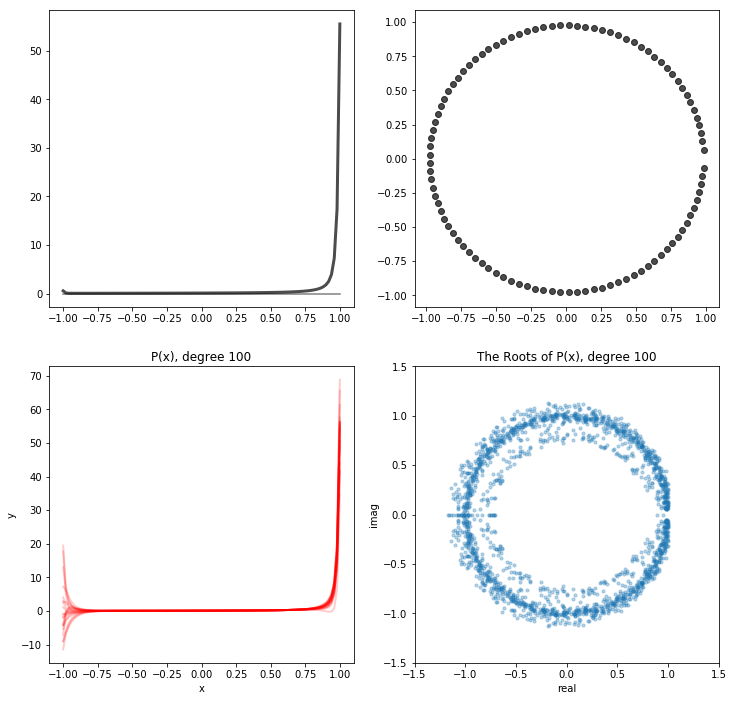

In [36]:
coeffs = np.linspace(.1,1,101)
p_mask =  (coeffs>.2) & (coeffs<.9)
print(p_mask)
params = [('normal',[0,1],{'size':sum(p_mask)})]
perturb_poly_roots(coeffs,p_mask,params,niters=20)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False False False False False False False
 False False False False False]


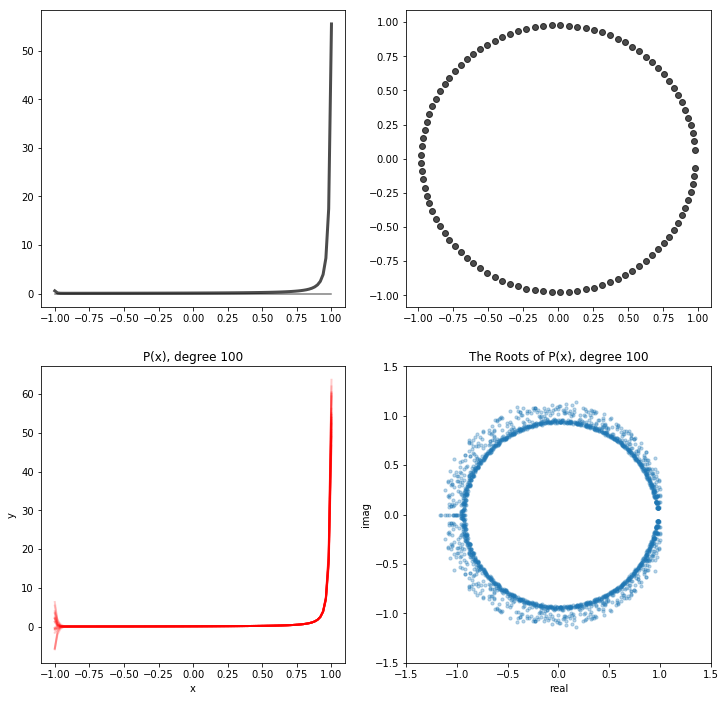

In [37]:
coeffs = np.linspace(.1,1,101)
p_mask = (coeffs<.9) & (coeffs>.6)
print(p_mask)
params = [('normal',[0,1],{'size':sum(p_mask)})]
perturb_poly_roots(coeffs,p_mask,params,niters=20)

[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False]


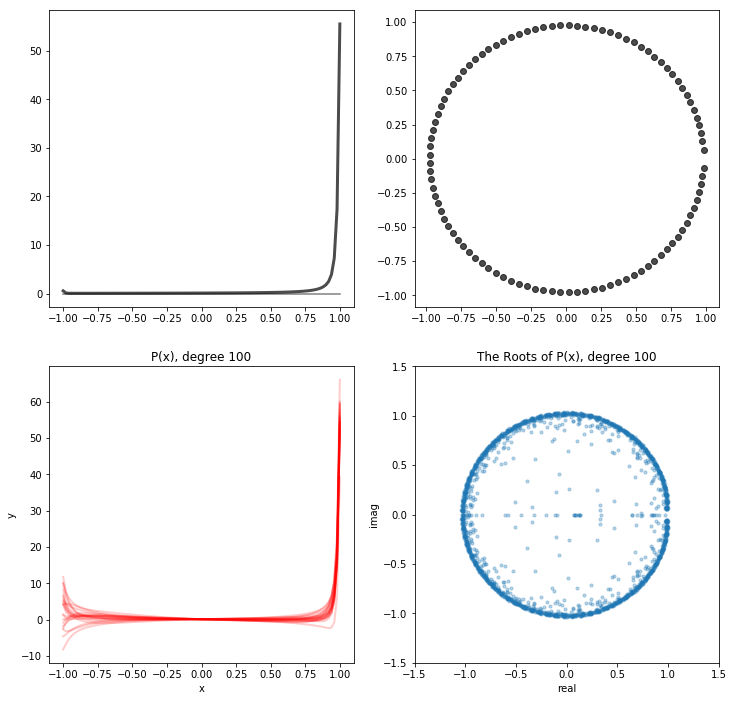

In [38]:
coeffs = np.linspace(.1,1,101)
p_mask =  (coeffs>.1) & (coeffs<.4)
print(p_mask)
params = [('normal',[0,1],{'size':sum(p_mask)})]
perturb_poly_roots(coeffs,p_mask,params,niters=20)

(100, 100)


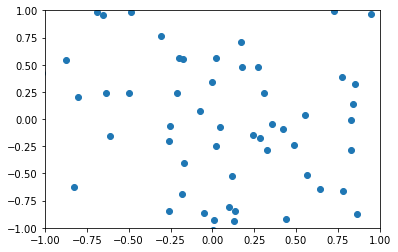

In [40]:
D = np.random.normal(0,1,size=100).astype(np.complex64)
D.imag += np.random.normal(0,1,size=100)
D = np.diag(D)
print(D.shape)
evals,evecs = np.linalg.eig(D)
plt.scatter(evals.real,evals.imag)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

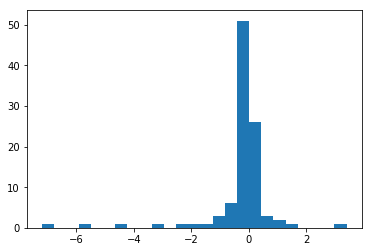

In [41]:
data = np.random.randn(100)*np.random.randn(100)*np.random.randn(100)*np.random.randn(100)
plt.hist(data,bins=25)
plt.show()

In [60]:

# generate several random polynomials with various distributions and plot their roots
def poly_deriv_roots(params,basis='power',dx=1,niters=1):
    """
    Plot random polynomials and their roots with coefficients specified by params.
    
    INPUTS
        params (list) input to the random_coeffs function
        basis (str) which polynomial type to use
        niters (int) number of polynomials to simulate
    
    """

    
    fig = plt.figure(figsize=(12,6))
    x = np.linspace(-1,1,100) # used for plotting P(x)
    X = [] # to store the real part of the roots
    Y = [] # to store the imaginary part of the roots
    dX = []
    dY = []
    plt.subplot(1,2,1) # the first subplot shows the polynomial on the xy plane
    plt.plot(x,np.zeros_like(x),color='grey') # plots the line y=0
    for i in range(niters):
        coeffs = random_coeffs(params)
        #P = np.polynomial.polynomial.Polynomial(coeffs)
        P = p_type(coeffs,basis)
        dP = P.deriv(m=dx)
        R = P.roots() # get the roots of P(x)
        dR = dP.roots()
        X.append(R.real)
        Y.append(R.imag)
        dX.append(dR.real)
        dY.append(dR.imag)
        plt.plot(x,P(x),color='r',alpha=.2,lw=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("P(x), degree %s" % (len(coeffs)-1))

    plt.subplot(1,2,2)
    plt.scatter(X,Y,alpha=.3,s=10)
    plt.scatter(dX,dY,alpha=.3,s=10,color='r')
    plt.title("The Roots of P(x), degree %s" % (len(coeffs)-1))
    plt.xlabel('real')
    plt.ylabel('imag')
    plt.xlim(-1.5,1.5)
    plt.ylim(-1.5,1.5)
    plt.show()

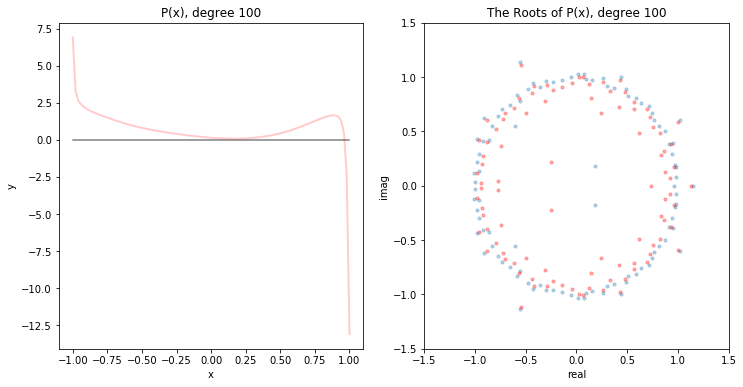

In [70]:
params = [('normal',[0,1],{'size':100})]
poly_deriv_roots(params,dx=2)

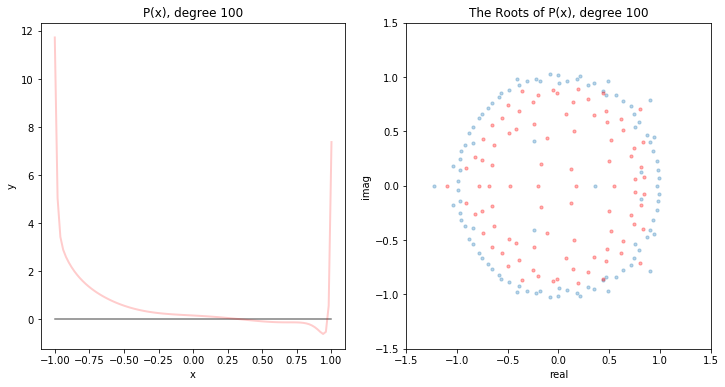

In [72]:
params = [('normal',[0,1],{'size':100})]
poly_deriv_roots(params,dx=10)

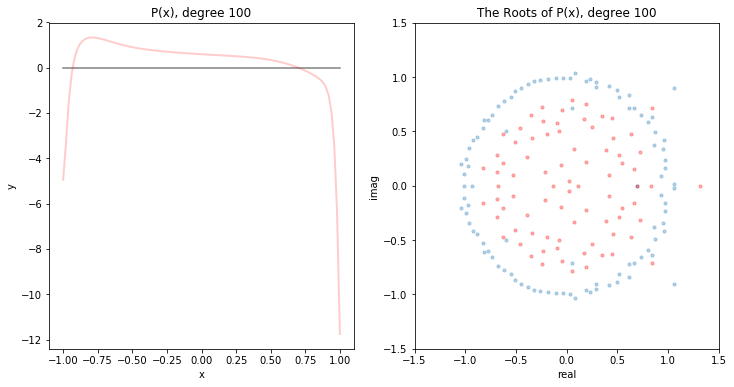

In [73]:
params = [('normal',[0,1],{'size':100})]
poly_deriv_roots(params,dx=20)

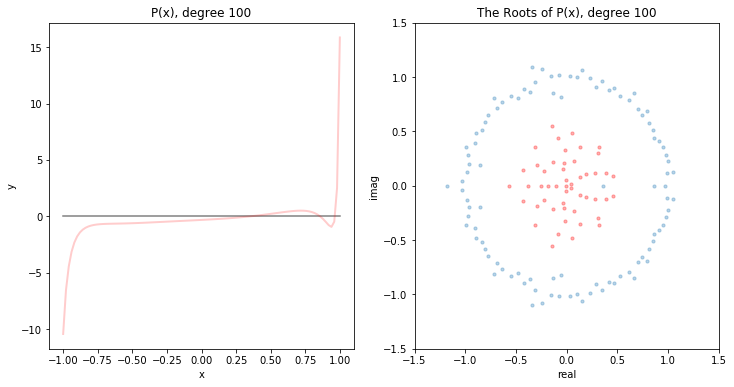

In [74]:
params = [('normal',[0,1],{'size':100})]
poly_deriv_roots(params,dx=50)